**Data 620 Week 6 Assignment**

Krutika Patel, Seung Min Song

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

1. [Brief Description](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis). Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
2. [Dataset](https://networkx.org/documentation/stable/auto_examples/algorithms/plot_davis_club.html).
3. Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html

What can you infer about the relationships between (1) the women, and (2) the social events?  

Please provide your code and analysis in an Jupyter notebook stored in your GitHub repository.
You may work in a small group on this project.

Due end of day 3/5.

In [12]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd

In [13]:
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print(len(clubs))


14


In [14]:
#print("Biadjacency matrix")
#print(bipartite.biadjacency_matrix(G, women, clubs))



In [15]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")



#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


In [16]:
# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")



#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


In [32]:
pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
#nx.draw(G, pos)
#plt.show()

**Vizualization**

We will take a look at the network. The women will be represented by blue nodes sized according tho their degree centrality, and event will be represented by yellow nodes sized by their degree centrality.

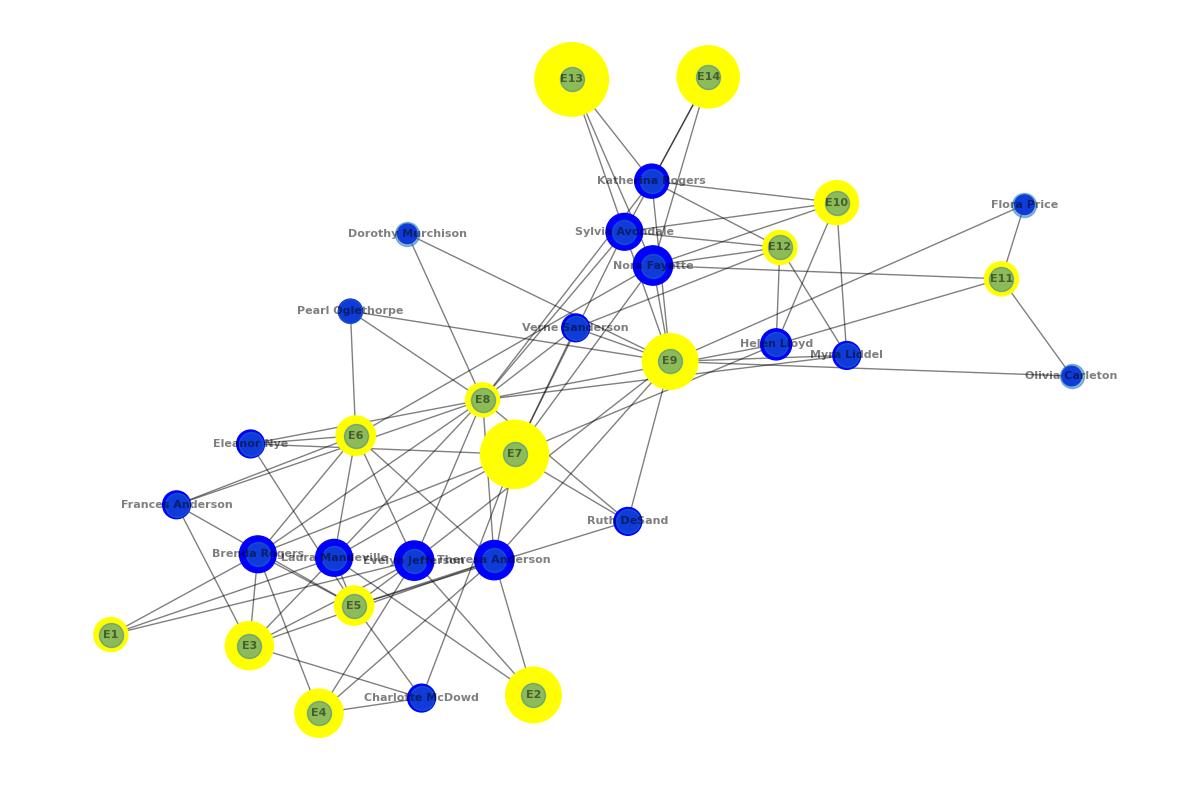

In [37]:
# calculate degree centrality
womenDegree = nx.degree(G, women)
eventsDegree = nx.degree(G, clubs)

plt.figure(1,figsize=(15,10))
plt.axis('off')

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=women,
                       node_color='blue',
                       node_size=[v * 100 for v in dict(womenDegree).values()])

nx.draw_networkx_nodes(G,pos,
                       nodelist=events,
                       node_color='yellow',
                       node_size=[v * 200 for v in dict(eventsDegree).values()])

# edges
nx.draw(G,pos,width=1.0,alpha=0.5, with_labels=True, font_size=8, font_color='black', font_weight='bold')

**Women Degree Centrality**

As we see in the newtwork that some of the women nodes are sized larger than others, we will take a look at their degree centrality, which represents the number of events they attended.

In [40]:
womenDegreeDF = pd.DataFrame()
womenDegreeDF['woman'], womenDegreeDF['event_connections'] = dict(womenDegree).keys(), dict(womenDegree).values()

womenDegreeDF.sort_values(by='event_connections', ascending = False)

,woman,event_connections
0,Evelyn Jefferson,8
2,Theresa Anderson,8
13,Nora Fayette,8
1,Laura Mandeville,7
3,Brenda Rogers,7
12,Sylvia Avondale,7
11,Katherina Rogers,6
14,Helen Lloyd,5
10,Myra Liddel,4
9,Verne Sanderson,4


Next we will project our bipartite graph onto women nodes. The graph will only have women nodes with edges connecting women if they were at the same event. We will also look at the numbers in a dataframe format

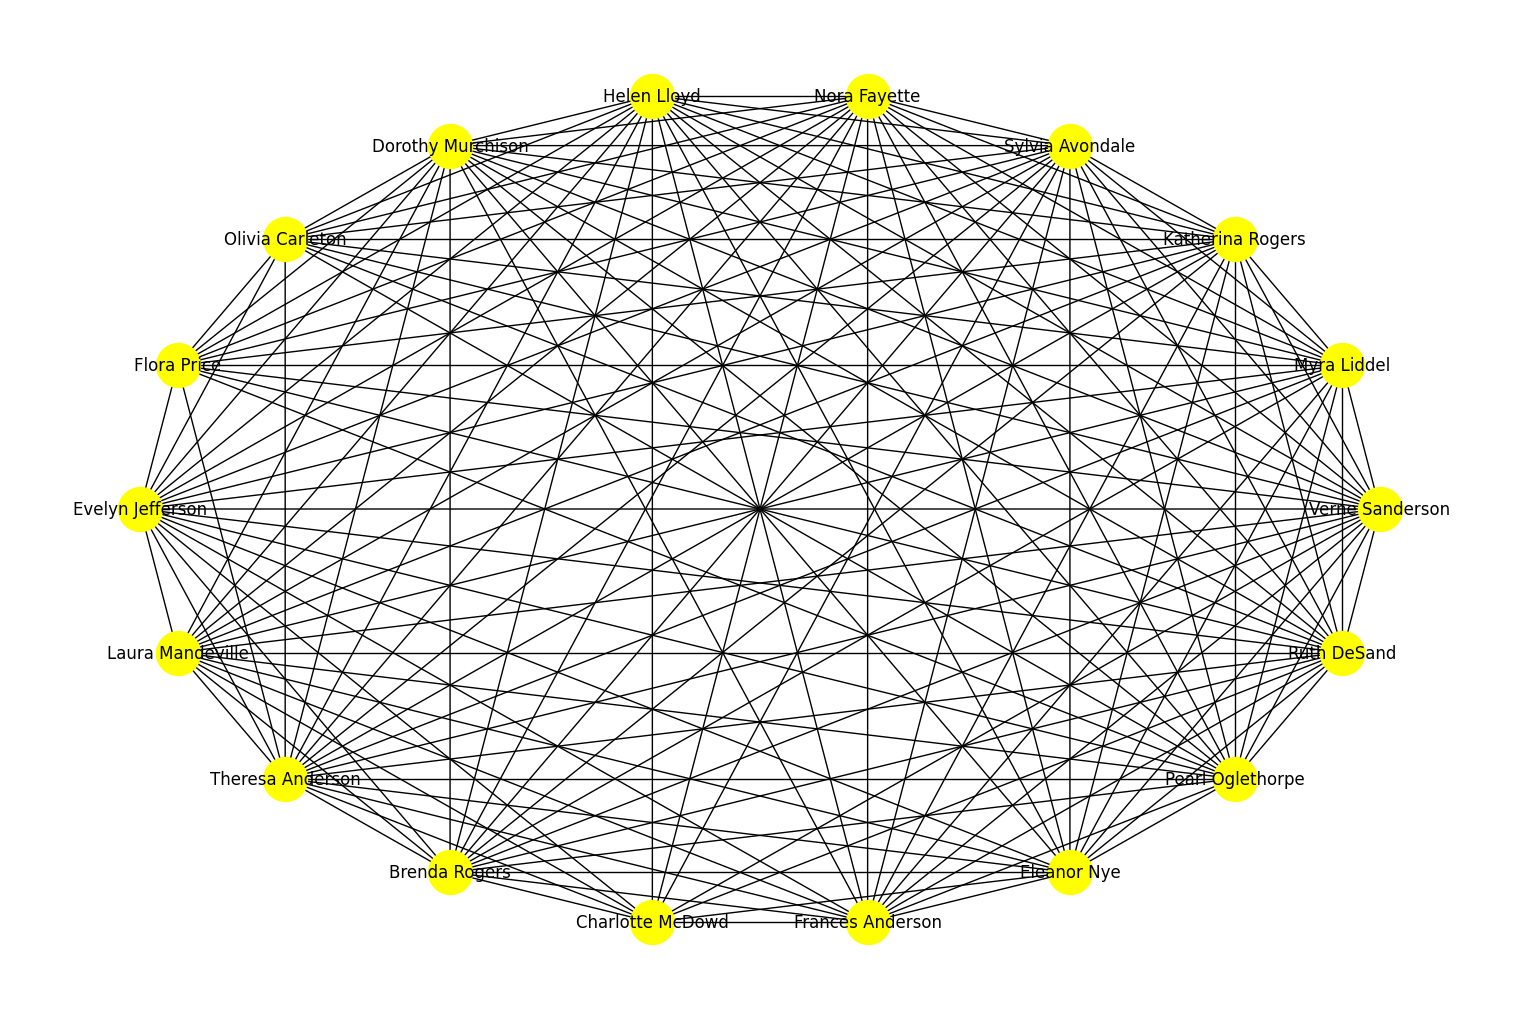

In [53]:
W = bipartite.projected_graph(G, women)
plt.figure(2,figsize=(15,10))
nx.draw_shell(W, with_labels = True, node_color = "yellow", node_size = 1000)

In [23]:
womenAcquaintanceship = pd.DataFrame({'woman': [w for w in women], \
                                'acquaintance_count': [W.degree(w) for w in women]})
womenAcquaintanceship.sort_values(by='acquaintance_count', ascending = False)

,woman,acquaintance_count
0,Evelyn Jefferson,17
8,Ruth DeSand,17
14,Helen Lloyd,17
13,Nora Fayette,17
12,Sylvia Avondale,17
9,Verne Sanderson,17
2,Theresa Anderson,17
7,Pearl Oglethorpe,16
10,Myra Liddel,16
11,Katherina Rogers,16


**Women Between Centrality**

* Betweenness centrality is an indicator that measures how much a word helps build a network of words.
* Betweenness centrality is measured by the number of times a specific node appears in the shortest path between all nodes.

In [20]:
womenBET = nx.betweenness_centrality(G)

sorted_womenBET = dict(sorted(womenBET.items(), key=lambda x: x[1], reverse=True))

count = 0
for node, centrality in sorted_womenBET.items():
    if count < 10:
        print(f"Node: {node}, Betweenness Centrality: {centrality}")
        count += 1
    else:
        break

Node: E8, Betweenness Centrality: 0.23700300426238308
Node: E9, Betweenness Centrality: 0.21920891071174742
Node: E7, Betweenness Centrality: 0.1258812653738273
Node: Nora Fayette, Betweenness Centrality: 0.10858130346049079
Node: Evelyn Jefferson, Betweenness Centrality: 0.09243053952845212
Node: Theresa Anderson, Betweenness Centrality: 0.08382717212549207
Node: Sylvia Avondale, Betweenness Centrality: 0.06862488078028632
Node: E6, Betweenness Centrality: 0.06319868906402719
Node: Laura Mandeville, Betweenness Centrality: 0.04914868366576943
Node: Brenda Rogers, Betweenness Centrality: 0.04735814390994237


**Women Closeness Centrality**

* Closeness centrality is a measure of how close one word is to another word.
Unlike betweenness centrality, which measures only directly connected nodes
* closeness centrality measures the distance between all nodes that are directly or indirectly connected.

In [21]:
womenCLO = nx.closeness_centrality(G, distance='weight')

sorted_womenCLO = dict(sorted(womenCLO.items(), key=lambda x: x[1], reverse=True))

count = 0
for node, centrality in sorted_womenCLO.items():
    if count < 10:
        print(f"Node: {node}, Close Centrality: {centrality}")
        count += 1
    else:
        break

Node: E8, Close Centrality: 0.5961538461538461
Node: E9, Close Centrality: 0.5535714285714286
Node: Evelyn Jefferson, Close Centrality: 0.5166666666666667
Node: Theresa Anderson, Close Centrality: 0.5166666666666667
Node: Nora Fayette, Close Centrality: 0.5166666666666667
Node: E7, Close Centrality: 0.5166666666666667
Node: Sylvia Avondale, Close Centrality: 0.5
Node: E6, Close Centrality: 0.484375
Node: Laura Mandeville, Close Centrality: 0.4696969696969697
Node: Brenda Rogers, Close Centrality: 0.4696969696969697


**Centrality Conlusion**

Comparing the results, there may be a certain correlation between Degreen Centrality, Betweenness Centrality and Close Centrality. The correlation between the three metrics may be higher, especially if the network is small or closely connected. Therefore, the results appear quite similar.


Among the events, E8, E9, E7, and E6 are strong in all three centralities, and among the women, Nora, Evelyn, Theresa, Sylvia, and Brenda are strong.

In [24]:
womenSocialActivity = womenDegreeDF.merge(womenAcquaintanceship)
womenSocialActivity.sort_values(by=['event_connections', 'acquaintance_count'], ascending = False)

,woman,event_connections,acquaintance_count
0,Evelyn Jefferson,8,17
2,Theresa Anderson,8,17
13,Nora Fayette,8,17
12,Sylvia Avondale,7,17
1,Laura Mandeville,7,15
3,Brenda Rogers,7,15
11,Katherina Rogers,6,16
14,Helen Lloyd,5,17
8,Ruth DeSand,4,17
9,Verne Sanderson,4,17


If we look at Dorthy's personal network we can see that she attended two events, E8 and E9, which had a larger coverage in terms of attendees

In [25]:
dorothy = nx.Graph(nx.ego_graph(G, 'Dorothy Murchison', radius = 2))
plt.figure(2,figsize=(15,10))
nx.d{ % highlight python %}
{% raw %}(dorothy, with_labels = True)

SyntaxError: invalid syntax (<ipython-input-25-1a749098e2f4>, line 3)